In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [47]:
import random 

random.seed(50)
x1 = random.sample(range(100), k=50)
x1 = np.array(x1)

x2 = random.sample(range(100), k=50)
x2 = np.array(x2)

In [51]:
np.mean(x1), np.std(x1)

(52.04, 28.120426739293983)

In [52]:
np.mean(x2), np.std(x2)

(49.52, 29.23233825748464)

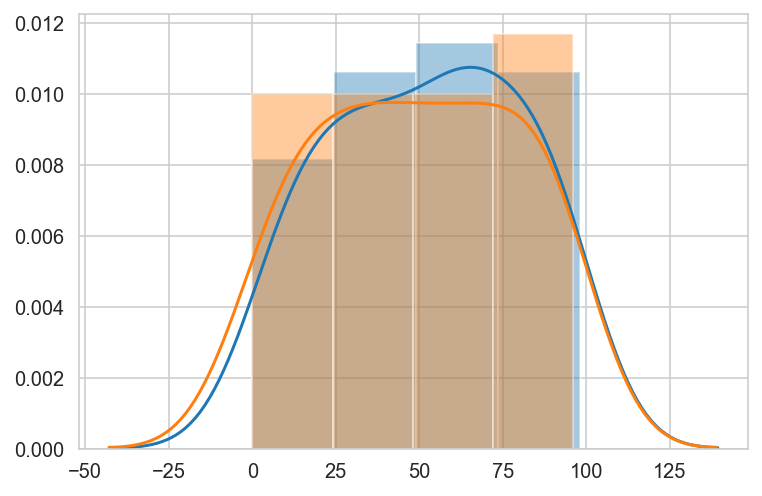

In [21]:
#Visually inspecting the distributions for differences in mean and standard deviation
sns.distplot(x1), sns.distplot(x2);

In [22]:
#Function for variance in each sample
def sample_variance(sample):
    var = np.var(sample)
    return var

In [25]:
#Finding each variance
sample_variance(x1), sample_variance(x2)

(790.7583999999999, 854.5296)

In [45]:
#Finding the critical T Value and P Value
def twosample_tstatistic(sample1, sample2):
    stat = stats.ttest_ind(sample1, sample2, equal_var = False)
    return stat

two_t = twosample_tstatistic(x1, x2)
print('T-Stat: ',two_t.statistic, ' P-Val: ',two_t.pvalue)

T-Stat:  0.4348881917666152  P-Val:  0.6646011936800353


In [43]:
#Check T-Test results
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=0.4348881917666152, pvalue=0.6645997593834008)

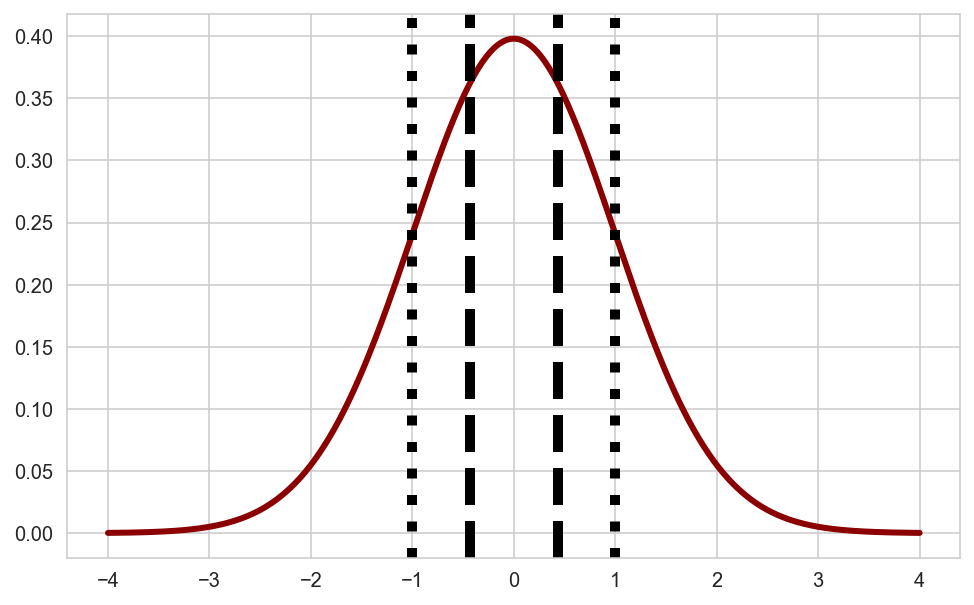

In [75]:
# Visualize p_value
def visualize_t(t_stat, sample1, sample2):
    
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.ppf to get critical value for alpha = 0.05 and one tailed test
    crit1 = stats.ttest_ind(sample1, sample2, equal_var = False)
    crit = crit1.statistic
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution    
    #Parameters:
    #x : array_like (quantiles), arg1, arg2, arg3,... : shape parameters for the distribution (lengths of axis), 
    #loc : mean, scale : std
    n_1 = len(sample1)
    n_2 = len(sample2)
    ys= stats.t.pdf(xs, (n_1+n_2-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    
    ax.axvline(alpha, color='black', linestyle=':', lw=5)
    ax.axvline(-alpha, color='black', linestyle=':', lw=5)
    
    plt.show()
    return None

sample1 = x1
sample2 = x2
t_stat = two_t.statistic
alpha = 1
visualize_t(t_stat, x1, x2)